In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
from tqdm.notebook import tqdm

In [3]:
dataset_train = list()


# 1. Train Data Pairs
with open('train_job/train.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):

        if i == 0:
            pass
        else:
            dataset_train.append([line[0], line[1], int(line[2])])

# 2. Job id to number/ Job tags

job_dict = dict()

with open('train_job/job_tags.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i == 0:
            pass
        else:
            try:
                job_dict[line[0]].append(line[1])
            except KeyError:
                job_dict[line[0]] = [line[1]]
                
# 3. Job id to company code and size. Not using right now
                
company_set = set()
jobs_set = set()
company_size_set = set()
job_id_to_com_size_dict = dict()

scales = {'': 0, 
          '1-10': 1, 
          '11-50': 2, 
          '51-100': 3, 
          '101-200': 4, 
          '201-500': 5, 
          '501-1000': 6, 
          '1000 이상': 7}

with open('train_job/job_companies.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i == 0:
            pass
#             print(line)
        else:
            company_set.add(line[0])
            jobs_set.add(line[1])
            company_size_set.add(line[2])
            job_id_to_com_size_dict[line[1]] = scales[line[2]]

# 4. User skills
            
user_dict = dict()

with open('train_job/user_tags.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i != 0:
    
            try:
                user_dict[line[0]].append(line[1])
            except KeyError:
                user_dict[line[0]] = [line[1]]

# 5. Job required skills
                
tag_dictionary = dict()
tag_idx_to_tag_list = list()

with open('train_job/tags.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i != 0:
            tag_dictionary[line[0]] = i - 1
            tag_idx_to_tag_list.append(line)
            assert len(tag_idx_to_tag_list) == i
    
def tagID2Vector(tag_list):
    vector = np.zeros(len(tag_dictionary))
    
    for tag in tag_list:
        vector[tag_dictionary[tag]] = 1
    
    return vector

def jobID2Vector(job_id):
    vector = np.zeros(len(tag_dictionary))
    for tag in job_dict[job_id]:
        vector[tag_dictionary[tag]] = 1
    assert np.sum(vector) == len(job_dict[job_id]), f'{np.sum(vector)} != {len(job_dict[job_id])}'
    return vector

def jobID2CompanyScale(job_id):
    vector = np.zeros(len(tag_dictionary))
    for tag in job_dict[job_id]:
        vector[tag_dictionary[tag]] = 1
    assert np.sum(vector) == len(job_dict[job_id]), f'{np.sum(vector)} != {len(job_dict[job_id])}'
    return vector

In [13]:
tag_counter = dict()

with open('train_job/user_tags.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i != 0:
    
            try:
                tag_counter[line[1]] += 1
            except KeyError:
                tag_counter[line[1]] = 1

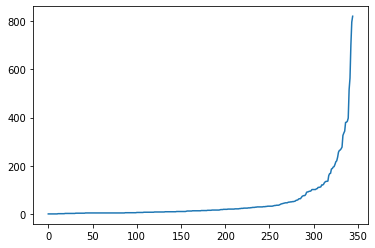

345
150 16339


In [32]:
counts = list()
for key in tag_counter:
    counts.append(tag_counter[key])
    
plt.figure()
plt.plot(sorted(counts))
plt.show()
    
print(len(tag_counter))

sum_counts = sum(counts)

sorted_counts = sorted(counts)

partial_sum = 0
for i, count in reversed(list(enumerate(sorted_counts))):
    partial_sum += count
    if partial_sum > sum_counts * 0.95:
        print(i, partial_sum)
        break

In [17]:
tag_counter_2 = dict()

with open('train_job/job_tags.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i == 0:
            pass
        else:
            try:
                tag_counter_2[line[1]] += 1
            except KeyError:
                tag_counter_2[line[1]] = 1

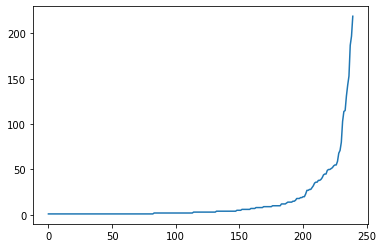

345
123 3305


In [33]:
counts = list()
for key in tag_counter_2:
    counts.append(tag_counter_2[key])
    
plt.figure()
plt.plot(sorted(counts))
plt.show()
    
print(len(tag_counter))

sum_counts = sum(counts)

sorted_counts = sorted(counts)

partial_sum = 0
for i, count in reversed(list(enumerate(sorted_counts))):
    partial_sum += count
    if partial_sum > sum_counts * 0.95:
        print(i, partial_sum)
        break

In [24]:
key_list = list()

for key in tag_counter:
    key_list.append(key)

for key in tag_counter_2:
    key_list.append(key)

print(len(tag_counter))

print(len(tag_counter_2))
    
print(len(key_list))
    
print(len(set(key_list)))
    
    

345
240
585
419


In [7]:
counter = [0 for i in range(8)]
all_counter = [0 for i in range(8)]

for i, elem in enumerate(dataset_train):
    user, job, apply = elem
    counter[job_id_to_com_size_dict[job]] += apply
    all_counter[job_id_to_com_size_dict[job]] += 1

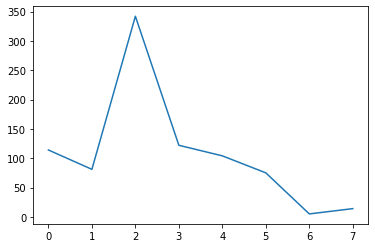

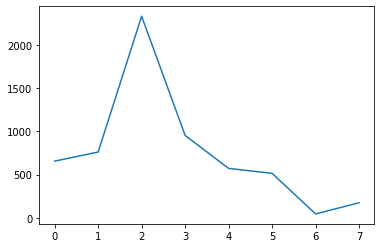

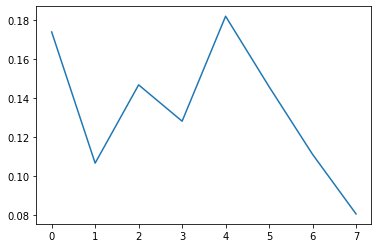

In [11]:
plt.figure()
plt.plot(counter)
plt.show()

plt.figure()
plt.plot(all_counter)
plt.show()

plt.figure()
plt.plot( [c / ac for c, ac in zip (counter, all_counter)])
plt.show()